In [57]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
plt.style.use("default")

In [59]:
def yes_no_to_bin(df: pd.DataFrame, colnames: list[str]):
    for col in colnames:
        df[col] = (df[col] == "YES").astype(int)

def n_from_10_to_n(df: pd.DataFrame, colnames: list[str]):
    """
    Converts "3 From 10" -> 3 (int)
    """
    for col in colnames:
        df[col] =  (df[col].str.replace(" From 10", "")).astype(int)

def to_dummies(df: pd.DataFrame, colnames: list[str]) -> pd.DataFrame:
    for col in colnames:
        dms = pd.get_dummies(df[col], prefix=col).astype(int)
        # dms.drop(columns=f"{col}_Seldom", inplace=True)
        df = pd.concat([df, dms], axis=1)

    df.drop(columns=colnames, inplace=True)
    return df

def seldom_often_to_1_4(df: pd.DataFrame, colnames: list[str]):
    for col in colnames:
        df[col] = df[col].map({
            "Seldom": 1,
            "Sometimes": 2,
            "Usually": 3,
            "Most-Often": 4,
        })

In [60]:
path = kagglehub.dataset_download("mdsultanulislamovi/mental-disorders-dataset")
print(path)
dataset = pd.read_csv(path + "/mental_disorders_dataset.csv")

n_from_10_to_n(dataset, [
    "Sexual Activity",
    "Concentration",
    "Optimisim",
])

yes_no_to_bin(dataset, [
    "Mood Swing",
    "Suicidal thoughts",
    "Anorxia",
    "Authority Respect",
    "Try-Explanation",
    "Aggressive Response",
    "Ignore & Move-On",
    "Nervous Break-down",
    "Admit Mistakes",
    "Overthinking",
])

seldom_often_to_1_4(dataset, [
    "Sadness",
    "Euphoric",
    "Exhausted",
    "Sleep dissorder"
])

# dataset_to_save = to_dummies(dataset, [
#     "Sadness",
#     "Euphoric",
#     "Exhausted",
#     "Sleep dissorder",
# ])

train_dataset, test_dataset = train_test_split(dataset, test_size=0.25, random_state=42)
train_dataset.to_csv("dataset/train_full.csv", index=False)
test_dataset.to_csv("dataset/test_full.csv", index=False)

# Removed due to high VIF
high_vif_columns = [
    "Exhausted",
    "Sexual Activity",
    "Optimisim",
    "Sleep dissorder",
]
train_dataset.drop(columns=high_vif_columns).to_csv("dataset/train.csv", index=False)
test_dataset.drop(columns=high_vif_columns).to_csv("dataset/test.csv", index=False)


X = dataset.drop(columns=["Expert Diagnose", "Patient Number"])

dataset.info()

/home/dom/.cache/kagglehub/datasets/mdsultanulislamovi/mental-disorders-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    int64 
 2   Euphoric             120 non-null    int64 
 3   Exhausted            120 non-null    int64 
 4   Sleep dissorder      120 non-null    int64 
 5   Mood Swing           120 non-null    int64 
 6   Suicidal thoughts    120 non-null    int64 
 7   Anorxia              120 non-null    int64 
 8   Authority Respect    120 non-null    int64 
 9   Try-Explanation      120 non-null    int64 
 10  Aggressive Response  120 non-null    int64 
 11  Ignore & Move-On     120 non-null    int64 
 12  Nervous Break-down   120 non-null    int64 
 13  Admit Mistakes       120 non-null    int64 
 14  Overthinking   

In [61]:
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,0,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


<Axes: xlabel='Expert Diagnose'>

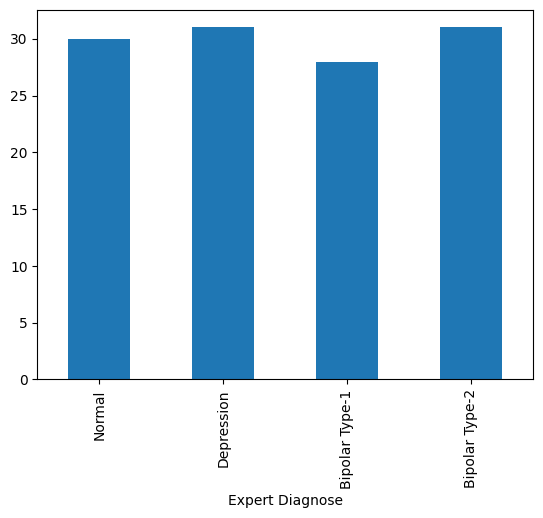

In [62]:
order = ["Normal", "Depression", "Bipolar Type-1", "Bipolar Type-2"]
dataset["Expert Diagnose"].value_counts().loc[order].plot.bar()

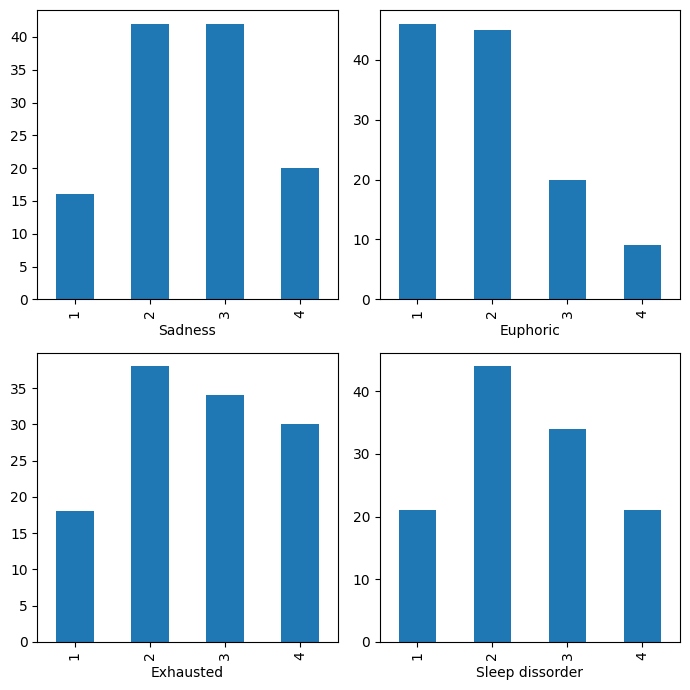

In [63]:
_, axs = plt.subplots(2, 2, figsize=(7, 7))
axs = axs.flatten()

order = [1, 2, 3, 4]

dataset["Sadness"].value_counts().loc[order].plot.bar(ax=axs[0])
dataset["Euphoric"].value_counts().loc[order].plot.bar(ax=axs[1])
dataset["Exhausted"].value_counts().loc[order].plot.bar(ax=axs[2])
dataset["Sleep dissorder"].value_counts().loc[order].plot.bar(ax=axs[3])

plt.tight_layout()
plt.show()

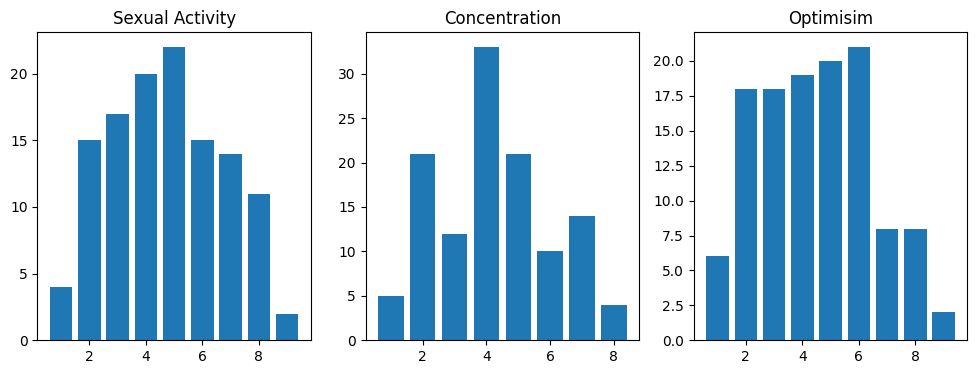

In [64]:
_, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

# "Sexual Activity",
# "Concentration",
# "Optimisim",
counts = dataset["Sexual Activity"].value_counts()
axs[0].bar(counts.index, counts.values)
axs[0].set_title("Sexual Activity")

counts = dataset["Concentration"].value_counts()
axs[1].bar(counts.index, counts.values)
axs[1].set_title("Concentration")

counts = dataset["Optimisim"].value_counts()
axs[2].bar(counts.index, counts.values)
axs[2].set_title("Optimisim")

plt.show()

In [65]:
def calculate_vif(df: pd.DataFrame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    print(vif_data)

In [66]:
calculate_vif(X)

                feature        VIF
0               Sadness   8.518776
1              Euphoric   7.872034
2             Exhausted  12.369252
3       Sleep dissorder   9.664041
4            Mood Swing   2.677704
5     Suicidal thoughts   2.346992
6               Anorxia   2.014443
7     Authority Respect   2.256142
8       Try-Explanation   2.151985
9   Aggressive Response   2.565854
10     Ignore & Move-On   1.906227
11   Nervous Break-down   2.401669
12       Admit Mistakes   2.180156
13         Overthinking   2.351934
14      Sexual Activity  13.511223
15        Concentration   7.870052
16            Optimisim  13.410670


In [67]:
calculate_vif(X.drop(columns=[
    "Sexual Activity",
]))

                feature        VIF
0               Sadness   8.515758
1              Euphoric   7.624819
2             Exhausted  10.878482
3       Sleep dissorder   9.606885
4            Mood Swing   2.618305
5     Suicidal thoughts   2.345084
6               Anorxia   1.928610
7     Authority Respect   2.212432
8       Try-Explanation   2.008892
9   Aggressive Response   2.391558
10     Ignore & Move-On   1.905510
11   Nervous Break-down   2.361591
12       Admit Mistakes   2.177406
13         Overthinking   2.330644
14        Concentration   7.580798
15            Optimisim   8.330272


In [68]:
calculate_vif(X.drop(columns=[
    "Sexual Activity",
    "Exhausted",
]))

                feature       VIF
0               Sadness  7.356713
1              Euphoric  7.616410
2       Sleep dissorder  8.018332
3            Mood Swing  2.603381
4     Suicidal thoughts  2.334843
5               Anorxia  1.911145
6     Authority Respect  2.187780
7       Try-Explanation  1.990134
8   Aggressive Response  2.390348
9      Ignore & Move-On  1.903450
10   Nervous Break-down  2.346783
11       Admit Mistakes  2.157576
12         Overthinking  2.292292
13        Concentration  6.898513
14            Optimisim  8.111223


In [69]:
calculate_vif(X.drop(columns=[
    "Sexual Activity",
    "Exhausted",
    "Optimisim",
]))

                feature       VIF
0               Sadness  7.159328
1              Euphoric  5.741725
2       Sleep dissorder  7.962726
3            Mood Swing  2.424523
4     Suicidal thoughts  2.263131
5               Anorxia  1.910538
6     Authority Respect  2.181016
7       Try-Explanation  1.985513
8   Aggressive Response  2.249606
9      Ignore & Move-On  1.896509
10   Nervous Break-down  2.329563
11       Admit Mistakes  2.155587
12         Overthinking  2.291164
13        Concentration  6.145256


In [70]:
calculate_vif(X.drop(columns=[
    "Sexual Activity",
    "Exhausted",
    "Optimisim",
    "Sleep dissorder"
]))

                feature       VIF
0               Sadness  6.178158
1              Euphoric  5.282705
2            Mood Swing  2.330613
3     Suicidal thoughts  2.163969
4               Anorxia  1.843216
5     Authority Respect  2.157642
6       Try-Explanation  1.977485
7   Aggressive Response  2.236461
8      Ignore & Move-On  1.884736
9    Nervous Break-down  2.322198
10       Admit Mistakes  2.151945
11         Overthinking  2.288132
12        Concentration  5.999201


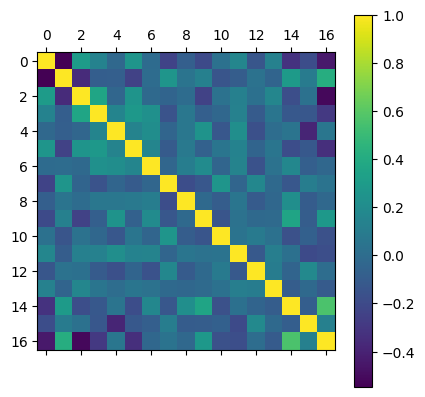

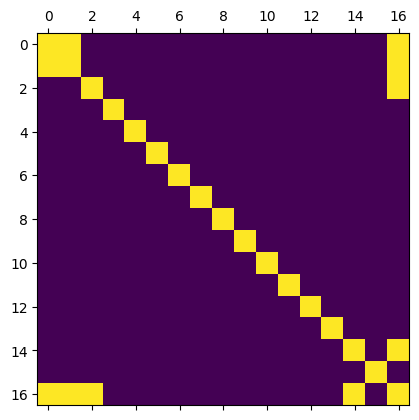

In [71]:
plt.matshow(X.corr())
plt.colorbar()

plt.matshow(X.corr().abs() >= 0.4)
plt.show()

array([[<Axes: xlabel='Sadness', ylabel='Sadness'>,
        <Axes: xlabel='Euphoric', ylabel='Sadness'>,
        <Axes: xlabel='Exhausted', ylabel='Sadness'>,
        <Axes: xlabel='Sleep dissorder', ylabel='Sadness'>,
        <Axes: xlabel='Mood Swing', ylabel='Sadness'>,
        <Axes: xlabel='Suicidal thoughts', ylabel='Sadness'>,
        <Axes: xlabel='Anorxia', ylabel='Sadness'>,
        <Axes: xlabel='Authority Respect', ylabel='Sadness'>,
        <Axes: xlabel='Try-Explanation', ylabel='Sadness'>,
        <Axes: xlabel='Aggressive Response', ylabel='Sadness'>,
        <Axes: xlabel='Ignore & Move-On', ylabel='Sadness'>,
        <Axes: xlabel='Nervous Break-down', ylabel='Sadness'>,
        <Axes: xlabel='Admit Mistakes', ylabel='Sadness'>,
        <Axes: xlabel='Overthinking', ylabel='Sadness'>,
        <Axes: xlabel='Sexual Activity', ylabel='Sadness'>,
        <Axes: xlabel='Concentration', ylabel='Sadness'>,
        <Axes: xlabel='Optimisim', ylabel='Sadness'>],
       [<Axes

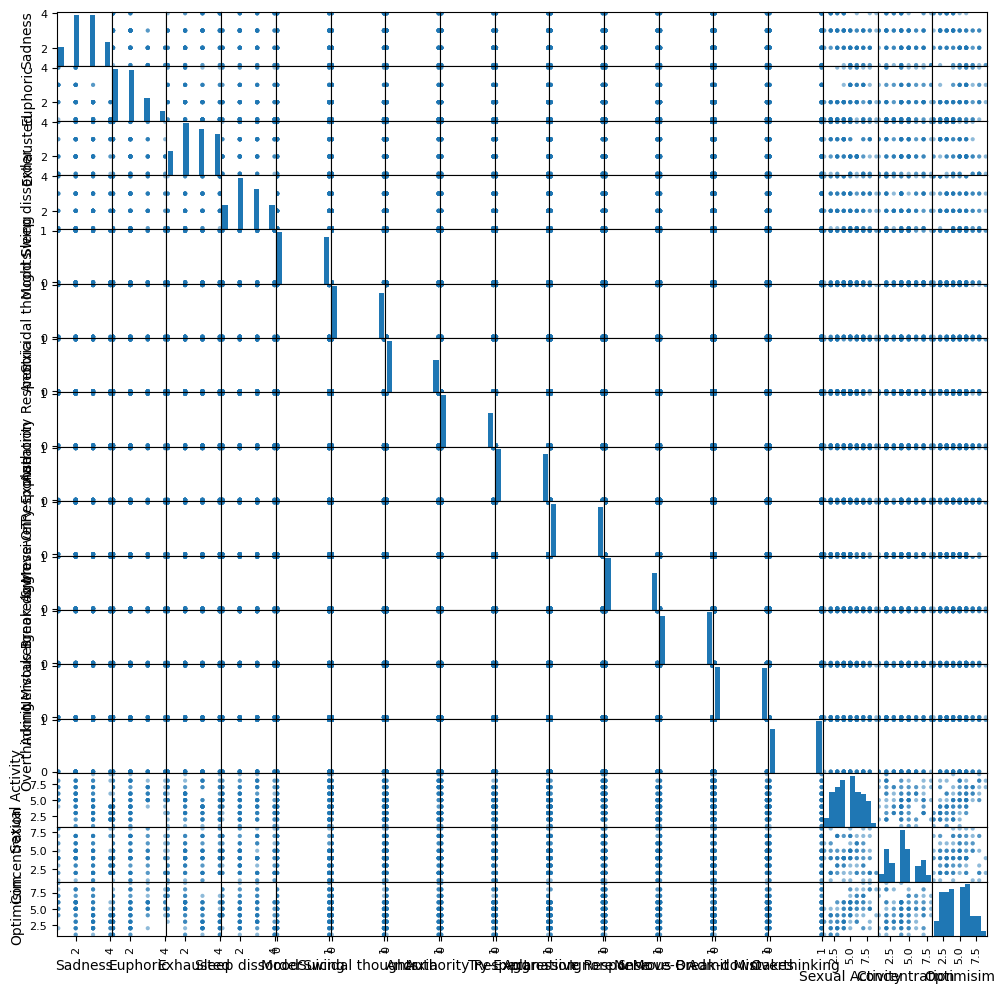

In [72]:
pd.plotting.scatter_matrix(X, figsize=(12, 12))